### Análise 3 - 03/04/2021
    Base manutenção de sistemas e subsistemas

---

#### Importação dos módulos utilizados

In [2]:
import pandas as pd
from numpy import std, mean, var, inf, isfinite, nan
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'

In [99]:
plt.style.use('ggplot')

---

#### Carregamento dos dados e padronização das colunas

In [14]:
csv = 'base.csv'
df_raw = pd.read_csv(csv, sep=';', encoding='latin-1')  # latin-1 no lugar de utf-8 salvou o dia aqui (Çs, acentos, etc..)
df_raw.columns = df_raw.columns.str.lower()
rename = {
    'classe de manutenção - código': 'cod_classe_manutencao',
    'classe de manutenção - descrição': 'desc_classe_manutencao',
    'funcionário - código': 'cod_funcionario',
    'sistema veicular - código': 'cod_sistema',
    'sistema veicular - código.1': 'desc_sistema',
    'subsistema veicular - código': 'cod_subsistema',
    'subsistema veicular - descrição': 'desc_subsistema',
    'data de entrada': 'data_entrada',
    'data de saída': 'data_saida',
    '%sistema veicular': '%sistema_veicular',
    '%funcionário': '%funcionario',
    '%data de saída': '%data_saida',
    '%data de entrada': '%data_entrada',
    '%classe de manutenção': '%classe_manutencao',
    '% geral': '%geral'
}
df_raw.rename(rename, axis=1, inplace=True)
df_raw['desc_sistema'] = df_raw['desc_sistema'].str.capitalize()
df_raw['desc_subsistema'] = df_raw['desc_subsistema'].str.capitalize()

In [15]:
df_raw

,cod_classe_manutencao,desc_classe_manutencao,data_entrada,data_saida,cod_funcionario,cod_sistema,desc_sistema,cod_subsistema,desc_subsistema,horas,%sistema_veicular,%funcionario,%data_saida,%data_entrada,%classe_manutencao,%geral
0,29,Corret. Emergencial,01/04/2020,01/04/2020,22955,1400,Sistema hidráulico,1402,Cilindro hidráulico,2.35,100.0,100.0,2.10,0.11,0.00,0.00
1,29,Corret. Emergencial,01/04/2020,01/04/2020,30413,1300,Sistema elétrico,1312,Indicadores diversos,4.74,100.0,100.0,4.23,0.23,0.00,0.00
2,29,Corret. Emergencial,01/04/2020,01/04/2020,41598,1400,Sistema hidráulico,1410,Mangueiras,2.99,100.0,100.0,2.67,0.15,0.00,0.00
3,29,Corret. Emergencial,01/04/2020,01/04/2020,50082,1000,Pneus e aros,1003,Pneus traseiros,0.29,100.0,100.0,0.26,0.01,0.00,0.00
4,29,Corret. Emergencial,01/04/2020,01/04/2020,52596,1300,Sistema elétrico,1301,Alternador,3.35,100.0,100.0,2.99,0.16,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51058,38,Preventiva Condição,23/12/2020,23/12/2020,101219,1300,Sistema elétrico,1316,Painel instrumentos,1.38,100.0,100.0,100.00,100.00,0.01,0.00
51059,38,Preventiva Condição,24/12/2020,28/12/2020,106135,1600,Sistema de transmissão,1605,Cambio,93.68,100.0,100.0,100.00,100.00,0.71,0.07
51060,38,Preventiva Condição,28/12/2020,28/12/2020,101661,1000,Pneus e aros,1003,Pneus traseiros,0.51,100.0,100.0,100.00,100.00,0.00,0.00
51061,38,Preventiva Condição,31/12/2020,31/12/2020,110203,1,Cabine,3,Estrutura cabine,4.58,100.0,100.0,100.00,100.00,0.03,0.00


##### Colunas e tipos

In [16]:
df_raw.dtypes

cod_classe_manutencao       int64
desc_classe_manutencao     object
data_entrada               object
data_saida                 object
cod_funcionario             int64
cod_sistema                 int64
desc_sistema               object
cod_subsistema              int64
desc_subsistema            object
horas                     float64
%sistema_veicular         float64
%funcionario              float64
%data_saida               float64
%data_entrada             float64
%classe_manutencao        float64
%geral                    float64
dtype: object

##### Agrupamento de tipos de manutencao

In [26]:
df_raw['desc_classe_manutencao'].value_counts()

Corret. Emergencial     27649
Preventiva por Tempo    18308
Preventiva Condição      4889
Preditiva                 216
Apoio                       1
Name: desc_classe_manutencao, dtype: int64

In [28]:
df_raw.loc[df_raw['desc_classe_manutencao'].isin(['Apoio', 'Preventiva Condição', 'Preventiva por Tempo']), 'desc_classe_manutencao'] = 'Preventivas'

In [30]:
df_raw['desc_classe_manutencao'].value_counts()

Corret. Emergencial    27649
Preventivas            23198
Preditiva                216
Name: desc_classe_manutencao, dtype: int64

---

In [68]:
#& (df_raw['desc_subsistema'] != 'Tanque de combustive')
df_raw[(df_raw['desc_sistema'] == 'Sistema de alimentação')]['horas'].value_counts().sort_index(ascending=False)

219.99    84
219.98    42
219.97    22
219.95     2
219.90     2
          ..
0.04      10
0.03      11
0.02      16
0.01       9
0.00      34
Name: horas, Length: 437, dtype: int64

#### Analise das medidas de dispersao por sistema de manutencao

In [ ]:
# distribuicao tipo de manutencao pra cada sistema
# eg. algum sistema sofre mais com manutencao emergencial?

In [87]:
df = df_raw.drop(['cod_classe_manutencao', 'cod_sistema', 'cod_subsistema'], axis=1)
df_classes = df.groupby(['desc_classe_manutencao', 'desc_sistema'])
df_classes['horas'].agg(['sum', 'describe']).reset_index()

desc_classe_manutencao                  desc_sistema       sum describe  \
                                                            horas    count   
0     Corret. Emergencial               Agregado câmbio      0.82      1.0   
1     Corret. Emergencial               Ar condicionado    109.48     44.0   
2     Corret. Emergencial                        Cabine   1828.45    670.0   
3     Corret. Emergencial                    Carroceria   2932.30    796.0   
4     Corret. Emergencial                       Chassis   7252.78   1840.0   
5     Corret. Emergencial                         Eixos   4027.70    827.0   
6     Corret. Emergencial                      Elevador   1060.67    488.0   
7     Corret. Emergencial                        Freios   7020.79   2170.0   
8     Corret. Emergencial                    Implemento   9909.66   2196.0   
9     Corret. Emergencial            Injeção eletrônica      7.00      1.0   
10    Corret. Emergencial          Maquinas e ferrament      7.77      1.0   
11    Corret. Emergencial              Material rodante   1093.66    323.0   
12    Corret. Emergencial                         Motor   3681.81   1016.0   
13    Corret. Emergencial                  Pneus e aros   2548.09   1856.0   
14    Corret. Emergencial        Sistema de alimentação  34996.49    602.0   
15    Corret. Emergencial      Sistema de arrefecimento   1373.71    419.0   
16    Corret. Emergencial            Sistema de direção    490.80    155.0   
17    Corret. Emergencial          Sistema de suspensão   4421.37   1428.0   
18    Corret. Emergencial        Sistema de transmissão   5049.27   1232.0   
19    Corret. Emergencial              Sistema elétrico  13269.10   5873.0   
20    Corret. Emergencial            Sistema hidráulico   7629.23   2847.0   
21    Corret. Emergencial  Sistema industrial colhedora   6295.51   2864.0   
22              Preditiva                    Carroceria    385.47     28.0   
23              Preditiva                       Chassis    311.79     32.0   
24              Preditiva                         Eixos    187.61     27.0   
25              Preditiva                        Freios     32.01      7.0   
26              Preditiva                    Implemento   1125.93     95.0   
27              Preditiva                         Motor      4.56      1.0   
28              Preditiva        Sistema de transmissão     43.41      3.0   
29              Preditiva              Sistema elétrico      5.03      1.0   
30              Preditiva            Sistema hidráulico    156.57     21.0   
31              Preditiva  Sistema industrial colhedora      3.62      1.0   
32            Preventivas               Ar condicionado     31.27     56.0   
33            Preventivas            Bomba pressão água      0.72      7.0   
34            Preventivas                        Cabine   1958.30    895.0   
35            Preventivas                    Carroceria   1172.68    317.0   
36            Preventivas                       Chassis   3975.02   2801.0   
37            Preventivas                         Eixos   1363.90    512.0   
38            Preventivas                      Elevador    281.85    128.0   
39            Preventivas                        Freios   1459.63    994.0   
40            Preventivas                    Implemento   2030.90    594.0   
41            Preventivas            Injeção eletrônica    134.49    283.0   
42            Preventivas           Kit amostra de óleo    213.34    677.0   
43            Preventivas              Material rodante    142.51     50.0   
44            Preventivas                         Motor   3011.71   5503.0   
45            Preventivas                  Pneus e aros    944.75   1129.0   
46            Preventivas                       Revisão     35.18     12.0   
47            Preventivas        Sistema de alimentação    647.21   1751.0   
48            Preventivas      Sistema de arrefecimento    194.24    221.0   
49            Preventivas

Text(0.5, 0.98, '')

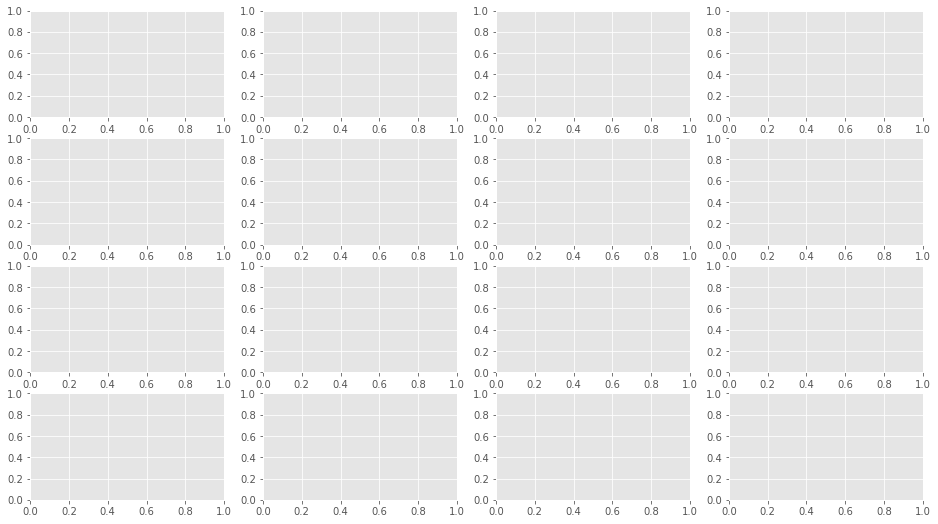

In [118]:
# grid  com 3 colunas de graficos
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 9))
fig.suptitle('', size=14)

#### Correlacao entre horas e dias de manutencao

In [93]:
df_datas = df_raw[['desc_classe_manutencao', 'desc_sistema', 'desc_subsistema', 'horas']]
df_datas['data_entrada'] = pd.to_datetime(df_raw['data_entrada'], format='%d/%m/%Y') 
df_datas['data_saida'] = pd.to_datetime(df_raw['data_saida'], format='%d/%m/%Y')
df_datas['dias_manutencao'] = (df_datas['data_saida'] - df_datas['data_entrada']).dt.days

data_gsCorr = df_datas.groupby(['desc_sistema'])[['horas', 'dias_manutencao']].mean().reset_index()

In [103]:
data_gsCorr.corr()

,horas,dias_manutencao
horas,1.000000,0.021522
dias_manutencao,0.021522,1.000000


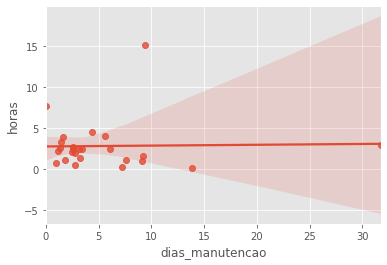

In [102]:
gs = sns.regplot(data=data_gsCorr, x='dias_manutencao', y='horas')

Nao existe uma correlacao expressiva entre horas e dias de manutencao (0.021), indicando que sistemas que demandam poucas horas de servico podem levar dias para serem reparados, assim como sistemas que carecem de muitas horas de servico podem ficar poucos dias parados. Ou seja, o numero de dias de servico de um sistema nao quer dizer muita coisa para o objetivo da analise.